# Kelompok 6
Anggota


1.   Agung Aryansyah Paruhum Daulay (235150201111069)
2.   Muhammad Arif Rifki (235150200111066)
3.   Revo Naufal Sadina (235150200111065)
4.   Muhammad Rafindran Luthfi (235150200111063)
5.   Yoga Raditya Nala (235150201111020)



## Import Dataset dan Library

In [ ]:
# Import Library yang dibutuhkan
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [77]:
# Unggah dataset
import os

if not os.path.exists('waterQuality1.csv'):
    print("Downloading dataset...")
    gdown.download(id='1SYQbPqcK9n5Lwd-bnXvFyrhO-ioBCyQE', output='waterQuality1.csv', quiet=False)
else:
    print("Dataset already exists, skipping download.")

df = pd.read_csv('waterQuality1.csv')
df.head()

Dataset already exists, skipping download.


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


## Preprocessing Data

In [78]:
# Mengetahui jumlah record dan fitur dari dataset seblum prepprocessing
df.shape

(7999, 21)

In [79]:
# Mencari tahu apakah ada nilai null pada setiap fitur
df.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [80]:
# Mengetahui tipe data masing masing fitur
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

None

In [81]:
# ubah data Object ke numeric
for col in df.columns:
    df[col] = df[col].replace('#NUM!', pd.NA)
    df[col] = pd.to_numeric(df[col], errors='coerce')
df['is_safe'] = df['is_safe'].astype('Int64')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

None

In [82]:
# Drop 3 data yang missing setelah diubah ke numerik
df = df.dropna(subset=['ammonia'])
df = df.dropna(subset=['is_safe'])
df = df

display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

None

In [83]:
# Mencari top 10 data yang paling berkolerasi dengan target ('is_safe')
print(df.head())
corr = df.corr()['is_safe'].abs().sort_values(ascending=False)
top_10 = corr[1:11]
print(top_10)

   aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65     9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32    21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01    14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36    11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92    24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  selenium  silver  uranium  

In [84]:
# Drop 10 fitur yang kurang berkorelasi dengan 'is_safe'
df.drop(columns=['ammonia', 'copper', 'flouride', 'bacteria', 'lead', 'nitrates', 'nitrites', 'mercury', 'radium', 'selenium'], inplace=True)
df.head()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,viruses,perchlorate,silver,uranium,is_safe
0,1.65,0.04,2.85,0.007,0.35,0.83,0.000,37.75,0.34,0.02,1
1,2.32,0.01,3.31,0.002,5.28,0.68,0.650,32.26,0.27,0.05,1
2,1.01,0.04,0.58,0.008,4.24,0.53,0.003,50.28,0.44,0.01,0
3,1.36,0.04,2.96,0.001,7.23,0.03,0.710,9.12,0.45,0.05,1
4,0.92,0.03,0.20,0.006,2.67,0.69,0.001,16.90,0.06,0.02,1


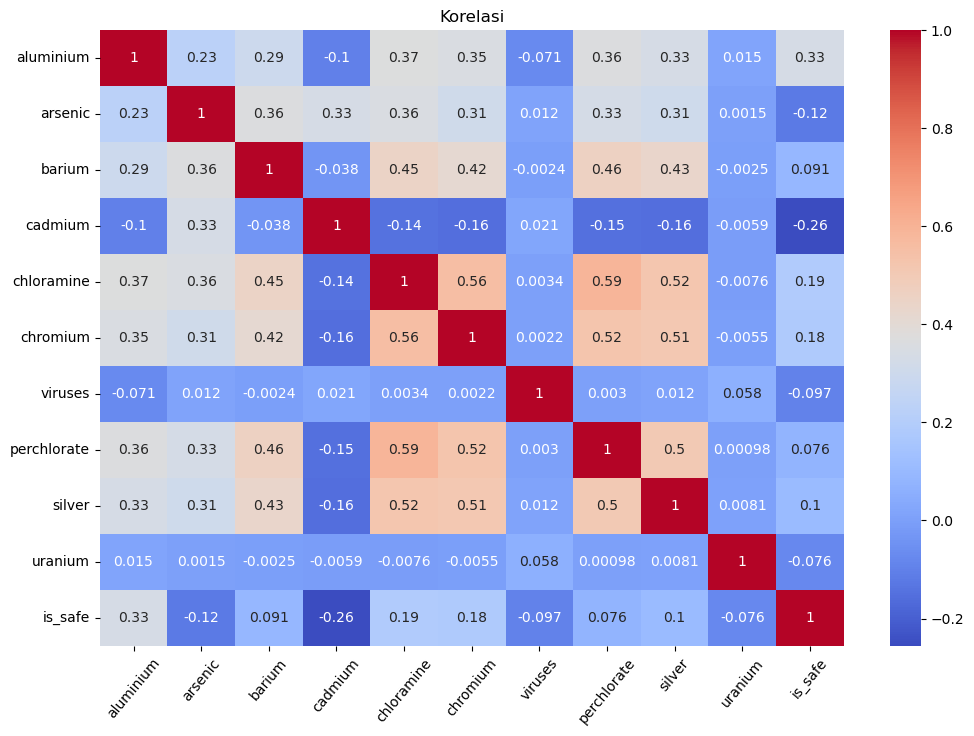

In [85]:
# Tampilkan plot korelasi dari seluruh fitur top 10
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi')
plt.xticks(rotation=50)
plt.show()

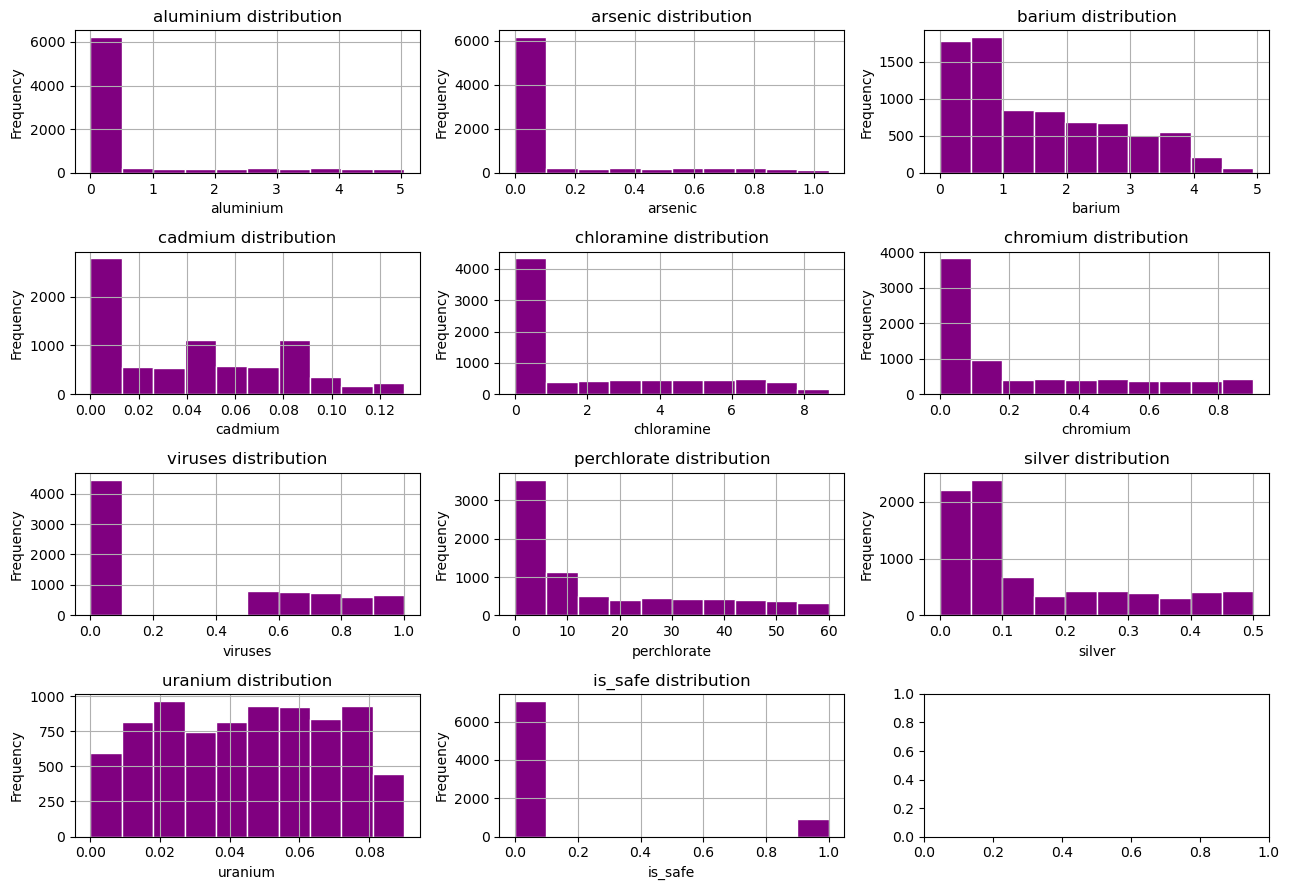

In [86]:
# Melihat persebaran data sebelum dilakukan normalisasi
persebaran = df.select_dtypes(include=['number'])

fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize=(13, 9))
axes = axes.flatten()

for i, column in enumerate(persebaran.columns):
    persebaran[column].hist(ax = axes[i], edgecolor='white', color = 'purple')

    axes[i].set_title(f'{column} distribution')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

/tmp/ipykernel_12184/765664522.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x='is_safe', order=grade_counts.index, palette="viridis")


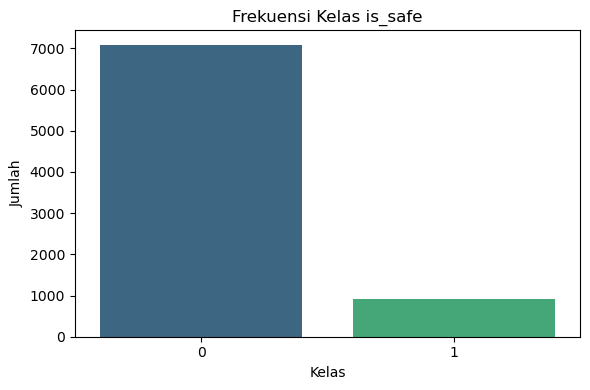

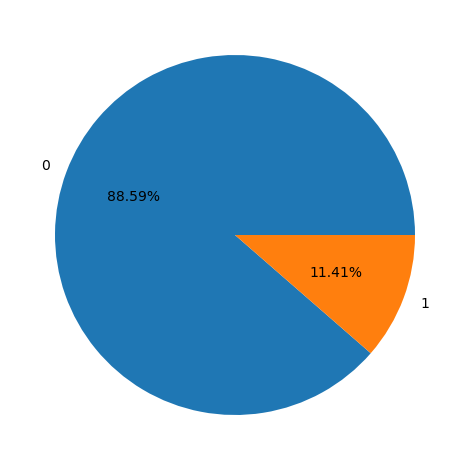

In [87]:
# Melihat perbandingan kelas target
grade_counts = df['is_safe'].value_counts()

plt.figure(figsize=(6,4))
sns.countplot(df, x='is_safe', order=grade_counts.index, palette="viridis")
plt.title('Frekuensi Kelas is_safe')
plt.ylabel('Jumlah')
plt.xlabel('Kelas')
plt.tight_layout()
plt.show()

grade_counts = df['is_safe'].value_counts()
plt.pie(grade_counts, autopct='%.2f%%', labels=grade_counts.index)
plt.tight_layout()
plt.show()

In [88]:
#Normalisasi menggunakan minmax
def minmax(df):
  list_fitur = df.columns[:-1]
  for fitur in list_fitur:
    max = df[fitur].max()
    min = df[fitur].min()
    df[fitur] = (df[fitur] - min) / (max - min)
  return df

data_normal = minmax(df.copy())
data_normal.head()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,viruses,perchlorate,silver,uranium,is_safe
0,0.326733,0.038095,0.576923,0.053846,0.040323,0.922222,0.000,0.629062,0.68,0.222222,1
1,0.459406,0.009524,0.670040,0.015385,0.608295,0.755556,0.650,0.537577,0.54,0.555556,1
2,0.200000,0.038095,0.117409,0.061538,0.488479,0.588889,0.003,0.837860,0.88,0.111111,0
3,0.269307,0.038095,0.599190,0.007692,0.832949,0.033333,0.710,0.151975,0.90,0.555556,1
4,0.182178,0.028571,0.040486,0.046154,0.307604,0.766667,0.001,0.281620,0.12,0.222222,1


In [89]:
#split data
data = data_normal.copy()
X = data.drop(columns=['is_safe']).values
y = data['is_safe'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

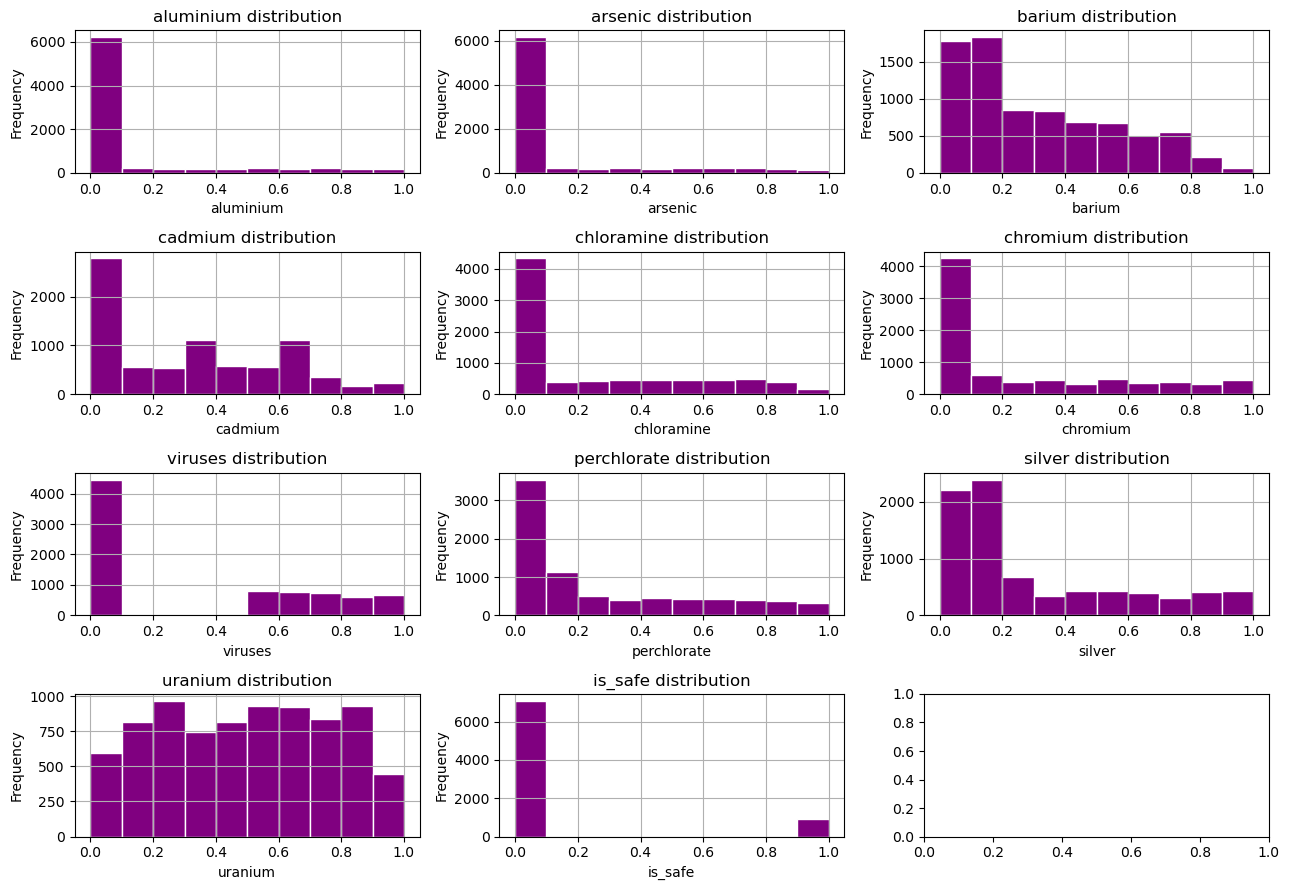

In [90]:
# Melihat persebaran data setelah dilakukan normalisasi
persebaran = data_normal.select_dtypes(include=['number'])

fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize=(13, 9))
axes = axes.flatten()

for i, column in enumerate(persebaran.columns):
    persebaran[column].hist(ax = axes[i], edgecolor='white', color = 'purple')

    axes[i].set_title(f'{column} distribution')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Backpropagation

In [91]:
def onehot_enc(labels, min_val=0):
  min_label = int(min(labels))
  num_classes = int(max(labels)) - min_label + 1
  encoded = np.full((len(labels), num_classes), min_val, np.int8)
  
  for i, label in enumerate(labels):
    class_index = int(label) - min_label
    encoded[i, class_index] = 1
  
  return encoded

def onehot_dec(encoded, min_label=0):
  return [np.argmax(row) + min_label for row in encoded]

### Fungsi Aktivasi

In [92]:
def sig(X):
  return 1 / (1 + np.exp(-X))

def sigd(X):
  s = sig(X)
  return s * (1 - s)

### Fungsi train backprop

In [93]:
def init(layer_conf):
  np.random.seed(42)
  num_layers = len(layer_conf)
  
  net_input = [np.empty(size) for size in layer_conf]
  
  activations = []
  for i, size in enumerate(layer_conf):
    if i < num_layers - 1:
      activations.append(np.empty(size + 1))
    else:
      activations.append(np.empty(size))
  
  weights = []
  for i in range(num_layers - 1):
    shape = (layer_conf[i] + 1, layer_conf[i + 1])
    weights.append(np.random.uniform(0, 1, shape))
  
  weight_updates = []
  for i in range(num_layers - 1):
    shape = (layer_conf[i] + 1, layer_conf[i + 1])
    weight_updates.append(np.empty(shape))
  
  deltas = [np.empty(size) for size in layer_conf[1:]]
  delta_inputs = [np.empty(size) for size in layer_conf[1:-1]]
  
  for i in range(len(activations) - 1):
    activations[i][-1] = 1
  
  return num_layers, net_input, activations, weights, weight_updates, deltas, delta_inputs

In [94]:
def forward_propagation(X_sample, activations, weights, net_input, num_layers):
  activations[0][:-1] = X_sample
  
  for layer in range(1, num_layers):
    net_input[layer] = np.dot(activations[layer - 1], weights[layer - 1])
    activations[layer][:len(net_input[layer])] = sig(net_input[layer])
    
  return activations[-1]

def backward_propagation(target, output, activations, weights, net_input, deltas, delta_inputs, weight_updates, learn_rate, num_layers):
  error = target - output
  
  deltas[-1] = error * sigd(net_input[-1])
  weight_updates[-1] = learn_rate * deltas[-1] * activations[-2].reshape((-1, 1))
  
  for layer in range(num_layers - 1, 1, -1):
    weights_T = np.transpose(weights[layer - 1][:-1])
    delta_inputs[layer - 2] = np.dot(deltas[layer - 1], weights_T)
    delta_inputs[layer - 2] = delta_inputs[layer - 2] * np.array(sigd(net_input[layer - 1]))
    deltas[layer - 2] = delta_inputs[layer - 2]
    
    activation_reshaped = activations[layer - 2].reshape((-1, 1))
    weight_updates[layer - 2] = learn_rate * deltas[layer - 2] * activation_reshaped
  
  return error

In [95]:
def update_weights(weights, weight_updates):
  for i in range(len(weights)):
    weights[i] += weight_updates[i]

def backward_propagation_fit(X, target, layer_conf, max_epoch, max_error=.1, learn_rate=.1):
  num_layers, net_input, activations, weights, weight_updates, deltas, delta_inputs = init(layer_conf)
  
  epoch = 0
  bce = 1

  best_bce = float('inf')
  patience = 20
  no_improve = 0
  
  while (max_epoch == -1 or epoch < max_epoch) and bce > max_error:
    epoch += 1
    bce = 0
    
    for sample_idx in range(len(X)):
      output = forward_propagation(X[sample_idx], activations, weights, net_input, num_layers)
      
      error = backward_propagation(target[sample_idx], output, activations, weights, net_input, deltas, delta_inputs, weight_updates, learn_rate, num_layers)
      
      epsilon = 1e-10
      bce -= np.sum(target[sample_idx] * np.log(output + epsilon) + (1 - target[sample_idx]) * np.log(1 - output + epsilon))
      
      update_weights(weights, weight_updates)

    bce /= len(X)

    if bce < best_bce:
      best_bce = bce
      no_improve = 0
    else:
      no_improve += 1
      if no_improve >= patience:
        break
        
    if epoch % 10 == 0:
      print(f'Epoch {epoch}, BCE: {bce}')
  
  return weights, epoch, bce

### Fungsi test backprop

In [96]:
def backward_propagation_predict(X, weights):
  activations = [np.empty(len(w)) for w in weights]
  net_input = [np.empty(len(w[0])) for w in weights]
  predictions = []
  activations.append(np.empty(len(weights[-1][0])))
  
  for sample in X:
    activations[0][:-1] = sample
    
    for layer in range(len(weights)):
      net_input[layer] = np.dot(activations[layer], weights[layer])
      activations[layer + 1][:len(net_input[layer])] = sig(net_input[layer])
    
    predictions.append(activations[-1].copy())
  
  predictions = np.array(predictions)
  return (predictions > 0.5).astype(int)

In [97]:
w, ep, bce = backward_propagation_fit(X_train, y_train, layer_conf=(10, 5, 1), learn_rate=0.1, max_epoch=500, max_error=0.01)

print(f'Epochs: {ep}, BCE: {bce}')

predict = backward_propagation_predict(X_test, w)

Epoch 10, BCE: 0.2525011458283895
Epoch 20, BCE: 0.2409499618085122
Epoch 30, BCE: 0.23680554452243943
Epoch 40, BCE: 0.23227782612409736
Epoch 50, BCE: 0.2288690552738975
Epoch 60, BCE: 0.22675034229464675
Epoch 70, BCE: 0.2248155460599892
Epoch 80, BCE: 0.22259454573610307
Epoch 90, BCE: 0.21997267900213707
Epoch 100, BCE: 0.21677033636735768
Epoch 110, BCE: 0.21228709737930418
Epoch 120, BCE: 0.20461607581419922
Epoch 130, BCE: 0.1952544865313303
Epoch 140, BCE: 0.19033297605477645
Epoch 150, BCE: 0.18850568864043254
Epoch 160, BCE: 0.188182096291231
Epoch 170, BCE: 0.1886665797441001
Epochs: 178, BCE: 0.18935912707118716


### Fungsi Evaluasi Model

In [98]:
def confusion_matrix(y_true, y_pred):
    tp = sum((yt == 1 and yp == 1) for yt, yp in zip(y_true, y_pred))
    tn = sum((yt == 0 and yp == 0) for yt, yp in zip(y_true, y_pred))
    fp = sum((yt == 0 and yp == 1) for yt, yp in zip(y_true, y_pred))
    fn = sum((yt == 1 and yp == 0) for yt, yp in zip(y_true, y_pred))
    return {'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn}

def accuracy(cm):
    return (cm['TP'] + cm['TN']) / (cm['TP'] + cm['TN'] + cm['FP'] + cm['FN'])

def precision(cm):
    if cm['TP'] + cm['FP'] == 0:
        return 0
    return cm['TP'] / (cm['TP'] + cm['FP'])

def recall(cm):
    if cm['TP'] + cm['FN'] == 0:
        return 0
    return cm['TP'] / (cm['TP'] + cm['FN'])

def f1_score(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

def print_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy(cm)
    prec = precision(cm)
    rec = recall(cm)
    f1 = f1_score(prec, rec)
    
    print("=" * 50)
    print(f"Confusion Matrix:")
    print(f"  TP: {cm['TP']}, TN: {cm['TN']}")
    print(f"  FP: {cm['FP']}, FN: {cm['FN']}")
    print(f"\nAccuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print("=" * 50)
    
    return {'confusion_matrix': cm, 'accuracy': acc, 'precision': prec, 'recall': rec, 'f1_score': f1}

print_metrics(y_test, predict.flatten())

Confusion Matrix:
  TP: 208, TN: 2024
  FP: 101, FN: 66

Accuracy:  0.9304
Precision: 0.6731
Recall:    0.7591
F1-Score:  0.7136


{'confusion_matrix': {'TP': np.int64(208),
  'TN': np.int64(2024),
  'FP': np.int64(101),
  'FN': np.int64(66)},
 'accuracy': np.float64(0.9303876615256357),
 'precision': np.float64(0.6731391585760518),
 'recall': np.float64(0.7591240875912408),
 'f1_score': np.float64(0.7135506003430532)}

## Verifikasi Perhitungan Manual

In [99]:
data = [
    [0.14, 0.12, 1.4, 0.68, 0.23, 0.04, 0.003, 3.25, 50.4, 0.04, 0],
    [0.01, 0.05, 0.19, 0.04, 0.02, 0.01, 0, 0.89, 11.96, 0.05, 0],
    [4.58, 0.12, 6.58, 0.11, 0.45, 0.06, 0.002, 1.68, 7.34, 0.04, 0],
    [2.26, 0.006, 5.22, 0.79, 0.01, 0.14, 0, 3.84, 16.06, 0.08, 1],
    [0.07, 0.08, 3.52, 0.69, 0.32, 0.05, 0.006, 2.32, 43.03, 0.03, 1],
    [4.19, 0.003, 3.09, 0.52, 0.01, 0.17, 0, 1.47, 19.88, 0.06, 1]
]

arr = np.array(data)

X_man = arr[:, :-1]  
y_man = arr[:, -1]   

initial_weights_data = [
  [-0.03, -0.06, -0.01],
  [0.03, 0.08, 0.07],
  [-0.02, 0.09, 0.09],
  [-0.08, -0.02, -0.01],
  [-0.08, -0.03, -0.08],
  [-0.02, 0.04, 0.07],
  [0.08, -0.08, -0.08],
  [-0.03, 0.00, 0.04],
  [0.00, 0.04, -0.03],
  [0.08, 0.04, 0.02],
  [0, 0, 0]
], [[-0.1],	[-0.03], [-0.02], [0]]

def print_weights_man(weights, layer_names=None):
  for layer_idx, weight_matrix in enumerate(weights):
    if layer_names:
      print(f"\n{layer_names[layer_idx]}:")
    else:
      print(f"\nLayer {layer_idx} → Layer {layer_idx + 1}:")
    
    print("-" * 80)
    rows, cols = weight_matrix.shape
    
    header = "       " + "".join([f"  Neuron_{j:02d} " for j in range(cols)])
    print(header)
    
    for i in range(rows):
      if i < rows - 1:
        row_label = f"Input_{i:02d}"
      else:
        row_label = "Bias    "
      
      row_values = "  ".join([f"{weight_matrix[i, j]:11.6f}" for j in range(cols)])
      print(f"{row_label}  {row_values}")
  
  print("="*80 + "\n")
    
def initialize_network_man(layer_conf, initial_weights_data):
  num_layers = len(layer_conf)
  
  net_input = [np.empty(size) for size in layer_conf]
  
  activations = []
  for i, size in enumerate(layer_conf):
    if i < num_layers - 1:
      activations.append(np.empty(size + 1))
    else:
      activations.append(np.empty(size))
  
  weights = []
  for i, weight_row in enumerate(initial_weights_data):
    weights.append(np.array(weight_row).reshape((layer_conf[i] + 1, -1)))
  
  weight_updates = []
  for i in range(num_layers - 1):
    shape = (layer_conf[i] + 1, layer_conf[i + 1])
    weight_updates.append(np.empty(shape))
  
  deltas = [np.empty(size) for size in layer_conf[1:]]
  delta_inputs = [np.empty(size) for size in layer_conf[1:-1]]
  
  for i in range(len(activations) - 1):
    activations[i][-1] = 1
  
  return num_layers, net_input, activations, weights, weight_updates, deltas, delta_inputs

def bp_fit_sig_man(X, target, layer_conf, max_epoch, max_error=.1, learn_rate=.1):
  num_layers, net_input, activations, weights, weight_updates, deltas, delta_inputs = initialize_network_man(layer_conf, initial_weights_data=initial_weights_data)
  
  # Print initial weights
  print("\n" + "#"*80)
  print("INITIAL WEIGHTS")
  print("#"*80)
  print_weights_man(weights)

  epoch = 0
  bce = 1
  
  while (max_epoch == -1 or epoch < max_epoch) and bce > max_error:
    epoch += 1
    bce = 0

    print(f"\n{'*'*80}")
    print(f"EPOCH {epoch}")
    print(f"{'*'*80}")
    
    for sample_idx in range(len(X)):
      print(f"\n{'─'*80}")
      print(f"Processing Sample {sample_idx + 1}/{len(X)}")
      print(f"{'─'*80}")

      output = forward_propagation_man(X[sample_idx], activations, weights, net_input, num_layers)
      
      error = backward_propagation_man(target[sample_idx], output, activations, weights, net_input, deltas, delta_inputs, weight_updates, learn_rate, num_layers)
      
      epsilon = 1e-10
      bce -= np.sum(target[sample_idx] * np.log(output + epsilon) + (1 - target[sample_idx]) * np.log(1 - output + epsilon))
      
      update_weights(weights, weight_updates)   

      # Print weights after update
      print(f"\nWeights after Sample {sample_idx + 1}:")
      print_weights_man(weights)   
    
    bce /= len(X)

    print(f'\n{"="*80}')
    print(f'Epoch {epoch} Complete - BCE: {bce}')
    print(f'{"="*80}\n')
    
  return weights, epoch, bce

def forward_propagation_man(X_sample, activations, weights, net_input, num_layers):
  activations[0][:-1] = X_sample
  
  for layer in range(1, num_layers):
    net_input[layer] = np.dot(activations[layer - 1], weights[layer - 1])
    activations[layer][:len(net_input[layer])] = sig(net_input[layer])

  return activations[-1]

def backward_propagation_man(target, output, activations, weights, net_input, deltas, delta_inputs, weight_updates, learn_rate, num_layers):
  error = target - output
  
  deltas[-1] = error * sigd(net_input[-1])
  weight_updates[-1] = learn_rate * deltas[-1] * activations[-2].reshape((-1, 1))
  
  for layer in range(num_layers - 1, 1, -1):
    weights_T = np.transpose(weights[layer - 1][:-1])
    delta_inputs[layer - 2] = np.dot(deltas[layer - 1], weights_T)
    delta_inputs[layer - 2] = delta_inputs[layer - 2] * np.array(sigd(net_input[layer - 1]))
    deltas[layer - 2] = delta_inputs[layer - 2]
    
    activation_reshaped = activations[layer - 2].reshape((-1, 1))
    weight_updates[layer - 2] = learn_rate * deltas[layer - 2] * activation_reshaped
  
  return error

In [101]:
w, ep, bce = bp_fit_sig_man(X_man, y_man, layer_conf=(10, 3, 1), learn_rate=0.01, max_epoch=2, max_error=0.01)
print_weights_man(w)

print(f'Epochs: {ep}, BCE: {bce}')

predict = backward_propagation_predict(X_man, w)


################################################################################
INITIAL WEIGHTS
################################################################################

Layer 0 → Layer 1:
--------------------------------------------------------------------------------
         Neuron_00   Neuron_01   Neuron_02 
Input_00    -0.030000    -0.060000    -0.010000
Input_01     0.030000     0.080000     0.070000
Input_02    -0.020000     0.090000     0.090000
Input_03    -0.080000    -0.020000    -0.010000
Input_04    -0.080000    -0.030000    -0.080000
Input_05    -0.020000     0.040000     0.070000
Input_06     0.080000    -0.080000    -0.080000
Input_07    -0.030000     0.000000     0.040000
Input_08     0.000000     0.040000    -0.030000
Input_09     0.080000     0.040000     0.020000
Bias         0.000000     0.000000     0.000000

Layer 1 → Layer 2:
--------------------------------------------------------------------------------
         Neuron_00 
Input_00    -0.100000
Input